# 9-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.  

새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.  


데이터는 sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.
데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!

- 당뇨병(diabetes) 데이터셋 예시로 보는 다중 선형 회귀
https://modulabs.co.kr/blog/diabetes-dataset-multi-linear-regression/

다음 과정을 차례대로 진행해주세요!

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

### (1) 데이터 가져오기
---
- sklearn.datasets의 load_diabetes 에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(diabetes.target, name="target")

In [4]:
# 사이킷런 사이트에서 확인해보면, 이는 모든 특성이 -0.2에서 0.2 사이에 분포하도록 조정
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [6]:
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

### (2) 모델에 입력할 데이터 X 준비하기
---
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [7]:
# 모델에 입력할 데이터 X 준비하기
X = df_X.values
X.shape

(442, 10)

### (3) 모델에 예측할 데이터 y 준비하기
---
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [8]:
y = df_y.values
y.shape

(442,)

### (4) train 데이터와 test 데이터로 분리하기
---
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


### (5) 모델 준비하기
---
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [10]:
W = np.zeros(X_train.shape[1])
b = 0.0

print(W.shape)

(10,)


In [11]:
# 모델 함수 구현 (선형 회귀 모델)
def model(X, W, b):
    return np.dot(X, W) + b

### (6) 손실함수 loss 정의하기
---
- 손실함수를 MSE 함수로 정의해주세요.

In [12]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기
---
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [14]:
# 기울기 계산 함수 구현 (gradient)
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

### (8) 하이퍼 파라미터인 학습률 설정하기
---
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [15]:
# 학습률 설정
LEARNING_RATE = 0.01

### (9) 모델 학습하기
---
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [16]:
num_iterations = 75000

In [17]:
losses = []

for i in range(num_iterations):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 0 : Loss 28774.4052
Iteration 10 : Loss 21220.0729
Iteration 20 : Loss 16174.1411
Iteration 30 : Loss 12802.8366
Iteration 40 : Loss 10549.5285
Iteration 50 : Loss 9042.6079
Iteration 60 : Loss 8033.9870
Iteration 70 : Loss 7358.0412
Iteration 80 : Loss 6904.1989
Iteration 90 : Loss 6598.6421
Iteration 100 : Loss 6392.0894
Iteration 110 : Loss 6251.6403
Iteration 120 : Loss 6155.3304
Iteration 130 : Loss 6088.4960
Iteration 140 : Loss 6041.3475
Iteration 150 : Loss 6007.3496
Iteration 160 : Loss 5982.1388
Iteration 170 : Loss 5962.8024
Iteration 180 : Loss 5947.3956
Iteration 190 : Loss 5934.6202
Iteration 200 : Loss 5923.6093
Iteration 210 : Loss 5913.7841
Iteration 220 : Loss 5904.7585
Iteration 230 : Loss 5896.2743
Iteration 240 : Loss 5888.1594
Iteration 250 : Loss 5880.2987
Iteration 260 : Loss 5872.6154
Iteration 270 : Loss 5865.0582
Iteration 280 : Loss 5857.5928
Iteration 290 : Loss 5850.1963
Iteration 300 : Loss 5842.8534
Iteration 310 : Loss 5835.5538
Iteration 320 

Iteration 2630 : Loss 4632.9712
Iteration 2640 : Loss 4629.3809
Iteration 2650 : Loss 4625.8009
Iteration 2660 : Loss 4622.2313
Iteration 2670 : Loss 4618.6719
Iteration 2680 : Loss 4615.1227
Iteration 2690 : Loss 4611.5836
Iteration 2700 : Loss 4608.0548
Iteration 2710 : Loss 4604.5360
Iteration 2720 : Loss 4601.0274
Iteration 2730 : Loss 4597.5287
Iteration 2740 : Loss 4594.0402
Iteration 2750 : Loss 4590.5615
Iteration 2760 : Loss 4587.0929
Iteration 2770 : Loss 4583.6341
Iteration 2780 : Loss 4580.1852
Iteration 2790 : Loss 4576.7462
Iteration 2800 : Loss 4573.3170
Iteration 2810 : Loss 4569.8976
Iteration 2820 : Loss 4566.4879
Iteration 2830 : Loss 4563.0880
Iteration 2840 : Loss 4559.6977
Iteration 2850 : Loss 4556.3171
Iteration 2860 : Loss 4552.9461
Iteration 2870 : Loss 4549.5848
Iteration 2880 : Loss 4546.2329
Iteration 2890 : Loss 4542.8906
Iteration 2900 : Loss 4539.5578
Iteration 2910 : Loss 4536.2345
Iteration 2920 : Loss 4532.9206
Iteration 2930 : Loss 4529.6160
Iteratio

Iteration 5360 : Loss 3943.3569
Iteration 5370 : Loss 3941.6295
Iteration 5380 : Loss 3939.9063
Iteration 5390 : Loss 3938.1874
Iteration 5400 : Loss 3936.4727
Iteration 5410 : Loss 3934.7622
Iteration 5420 : Loss 3933.0559
Iteration 5430 : Loss 3931.3537
Iteration 5440 : Loss 3929.6558
Iteration 5450 : Loss 3927.9620
Iteration 5460 : Loss 3926.2724
Iteration 5470 : Loss 3924.5869
Iteration 5480 : Loss 3922.9055
Iteration 5490 : Loss 3921.2282
Iteration 5500 : Loss 3919.5551
Iteration 5510 : Loss 3917.8860
Iteration 5520 : Loss 3916.2210
Iteration 5530 : Loss 3914.5600
Iteration 5540 : Loss 3912.9031
Iteration 5550 : Loss 3911.2502
Iteration 5560 : Loss 3909.6013
Iteration 5570 : Loss 3907.9565
Iteration 5580 : Loss 3906.3156
Iteration 5590 : Loss 3904.6788
Iteration 5600 : Loss 3903.0458
Iteration 5610 : Loss 3901.4169
Iteration 5620 : Loss 3899.7919
Iteration 5630 : Loss 3898.1708
Iteration 5640 : Loss 3896.5537
Iteration 5650 : Loss 3894.9404
Iteration 5660 : Loss 3893.3311
Iteratio

Iteration 8080 : Loss 3594.6460
Iteration 8090 : Loss 3593.7066
Iteration 8100 : Loss 3592.7690
Iteration 8110 : Loss 3591.8333
Iteration 8120 : Loss 3590.8995
Iteration 8130 : Loss 3589.9676
Iteration 8140 : Loss 3589.0376
Iteration 8150 : Loss 3588.1094
Iteration 8160 : Loss 3587.1830
Iteration 8170 : Loss 3586.2586
Iteration 8180 : Loss 3585.3359
Iteration 8190 : Loss 3584.4152
Iteration 8200 : Loss 3583.4962
Iteration 8210 : Loss 3582.5791
Iteration 8220 : Loss 3581.6638
Iteration 8230 : Loss 3580.7503
Iteration 8240 : Loss 3579.8387
Iteration 8250 : Loss 3578.9289
Iteration 8260 : Loss 3578.0208
Iteration 8270 : Loss 3577.1146
Iteration 8280 : Loss 3576.2102
Iteration 8290 : Loss 3575.3076
Iteration 8300 : Loss 3574.4067
Iteration 8310 : Loss 3573.5077
Iteration 8320 : Loss 3572.6104
Iteration 8330 : Loss 3571.7149
Iteration 8340 : Loss 3570.8211
Iteration 8350 : Loss 3569.9291
Iteration 8360 : Loss 3569.0389
Iteration 8370 : Loss 3568.1504
Iteration 8380 : Loss 3567.2637
Iteratio

Iteration 11130 : Loss 3376.0054
Iteration 11140 : Loss 3375.4609
Iteration 11150 : Loss 3374.9173
Iteration 11160 : Loss 3374.3745
Iteration 11170 : Loss 3373.8326
Iteration 11180 : Loss 3373.2915
Iteration 11190 : Loss 3372.7513
Iteration 11200 : Loss 3372.2119
Iteration 11210 : Loss 3371.6734
Iteration 11220 : Loss 3371.1358
Iteration 11230 : Loss 3370.5989
Iteration 11240 : Loss 3370.0630
Iteration 11250 : Loss 3369.5278
Iteration 11260 : Loss 3368.9935
Iteration 11270 : Loss 3368.4601
Iteration 11280 : Loss 3367.9274
Iteration 11290 : Loss 3367.3956
Iteration 11300 : Loss 3366.8647
Iteration 11310 : Loss 3366.3346
Iteration 11320 : Loss 3365.8052
Iteration 11330 : Loss 3365.2768
Iteration 11340 : Loss 3364.7491
Iteration 11350 : Loss 3364.2223
Iteration 11360 : Loss 3363.6963
Iteration 11370 : Loss 3363.1711
Iteration 11380 : Loss 3362.6467
Iteration 11390 : Loss 3362.1231
Iteration 11400 : Loss 3361.6004
Iteration 11410 : Loss 3361.0784
Iteration 11420 : Loss 3360.5573
Iteration 

Iteration 13770 : Loss 3257.0774
Iteration 13780 : Loss 3256.7055
Iteration 13790 : Loss 3256.3341
Iteration 13800 : Loss 3255.9632
Iteration 13810 : Loss 3255.5928
Iteration 13820 : Loss 3255.2228
Iteration 13830 : Loss 3254.8534
Iteration 13840 : Loss 3254.4844
Iteration 13850 : Loss 3254.1159
Iteration 13860 : Loss 3253.7479
Iteration 13870 : Loss 3253.3804
Iteration 13880 : Loss 3253.0134
Iteration 13890 : Loss 3252.6468
Iteration 13900 : Loss 3252.2808
Iteration 13910 : Loss 3251.9152
Iteration 13920 : Loss 3251.5501
Iteration 13930 : Loss 3251.1855
Iteration 13940 : Loss 3250.8213
Iteration 13950 : Loss 3250.4576
Iteration 13960 : Loss 3250.0944
Iteration 13970 : Loss 3249.7317
Iteration 13980 : Loss 3249.3695
Iteration 13990 : Loss 3249.0077
Iteration 14000 : Loss 3248.6464
Iteration 14010 : Loss 3248.2856
Iteration 14020 : Loss 3247.9252
Iteration 14030 : Loss 3247.5653
Iteration 14040 : Loss 3247.2059
Iteration 14050 : Loss 3246.8470
Iteration 14060 : Loss 3246.4885
Iteration 

Iteration 16520 : Loss 3170.6078
Iteration 16530 : Loss 3170.3428
Iteration 16540 : Loss 3170.0781
Iteration 16550 : Loss 3169.8137
Iteration 16560 : Loss 3169.5496
Iteration 16570 : Loss 3169.2858
Iteration 16580 : Loss 3169.0223
Iteration 16590 : Loss 3168.7591
Iteration 16600 : Loss 3168.4962
Iteration 16610 : Loss 3168.2337
Iteration 16620 : Loss 3167.9714
Iteration 16630 : Loss 3167.7094
Iteration 16640 : Loss 3167.4477
Iteration 16650 : Loss 3167.1864
Iteration 16660 : Loss 3166.9253
Iteration 16670 : Loss 3166.6645
Iteration 16680 : Loss 3166.4040
Iteration 16690 : Loss 3166.1439
Iteration 16700 : Loss 3165.8840
Iteration 16710 : Loss 3165.6244
Iteration 16720 : Loss 3165.3651
Iteration 16730 : Loss 3165.1061
Iteration 16740 : Loss 3164.8474
Iteration 16750 : Loss 3164.5891
Iteration 16760 : Loss 3164.3310
Iteration 16770 : Loss 3164.0732
Iteration 16780 : Loss 3163.8157
Iteration 16790 : Loss 3163.5584
Iteration 16800 : Loss 3163.3015
Iteration 16810 : Loss 3163.0449
Iteration 

Iteration 19060 : Loss 3112.0026
Iteration 19070 : Loss 3111.8025
Iteration 19080 : Loss 3111.6026
Iteration 19090 : Loss 3111.4029
Iteration 19100 : Loss 3111.2034
Iteration 19110 : Loss 3111.0042
Iteration 19120 : Loss 3110.8051
Iteration 19130 : Loss 3110.6063
Iteration 19140 : Loss 3110.4077
Iteration 19150 : Loss 3110.2092
Iteration 19160 : Loss 3110.0110
Iteration 19170 : Loss 3109.8130
Iteration 19180 : Loss 3109.6152
Iteration 19190 : Loss 3109.4177
Iteration 19200 : Loss 3109.2203
Iteration 19210 : Loss 3109.0231
Iteration 19220 : Loss 3108.8262
Iteration 19230 : Loss 3108.6294
Iteration 19240 : Loss 3108.4329
Iteration 19250 : Loss 3108.2366
Iteration 19260 : Loss 3108.0405
Iteration 19270 : Loss 3107.8446
Iteration 19280 : Loss 3107.6489
Iteration 19290 : Loss 3107.4534
Iteration 19300 : Loss 3107.2581
Iteration 19310 : Loss 3107.0630
Iteration 19320 : Loss 3106.8681
Iteration 19330 : Loss 3106.6734
Iteration 19340 : Loss 3106.4790
Iteration 19350 : Loss 3106.2847
Iteration 

Iteration 21990 : Loss 3061.4413
Iteration 22000 : Loss 3061.2933
Iteration 22010 : Loss 3061.1454
Iteration 22020 : Loss 3060.9978
Iteration 22030 : Loss 3060.8502
Iteration 22040 : Loss 3060.7028
Iteration 22050 : Loss 3060.5556
Iteration 22060 : Loss 3060.4085
Iteration 22070 : Loss 3060.2616
Iteration 22080 : Loss 3060.1148
Iteration 22090 : Loss 3059.9681
Iteration 22100 : Loss 3059.8216
Iteration 22110 : Loss 3059.6753
Iteration 22120 : Loss 3059.5291
Iteration 22130 : Loss 3059.3830
Iteration 22140 : Loss 3059.2371
Iteration 22150 : Loss 3059.0913
Iteration 22160 : Loss 3058.9457
Iteration 22170 : Loss 3058.8002
Iteration 22180 : Loss 3058.6549
Iteration 22190 : Loss 3058.5097
Iteration 22200 : Loss 3058.3646
Iteration 22210 : Loss 3058.2197
Iteration 22220 : Loss 3058.0750
Iteration 22230 : Loss 3057.9304
Iteration 22240 : Loss 3057.7859
Iteration 22250 : Loss 3057.6416
Iteration 22260 : Loss 3057.4974
Iteration 22270 : Loss 3057.3534
Iteration 22280 : Loss 3057.2095
Iteration 

Iteration 24550 : Loss 3027.9615
Iteration 24560 : Loss 3027.8465
Iteration 24570 : Loss 3027.7316
Iteration 24580 : Loss 3027.6168
Iteration 24590 : Loss 3027.5021
Iteration 24600 : Loss 3027.3875
Iteration 24610 : Loss 3027.2730
Iteration 24620 : Loss 3027.1587
Iteration 24630 : Loss 3027.0444
Iteration 24640 : Loss 3026.9303
Iteration 24650 : Loss 3026.8163
Iteration 24660 : Loss 3026.7023
Iteration 24670 : Loss 3026.5885
Iteration 24680 : Loss 3026.4748
Iteration 24690 : Loss 3026.3612
Iteration 24700 : Loss 3026.2478
Iteration 24710 : Loss 3026.1344
Iteration 24720 : Loss 3026.0211
Iteration 24730 : Loss 3025.9080
Iteration 24740 : Loss 3025.7950
Iteration 24750 : Loss 3025.6820
Iteration 24760 : Loss 3025.5692
Iteration 24770 : Loss 3025.4565
Iteration 24780 : Loss 3025.3439
Iteration 24790 : Loss 3025.2314
Iteration 24800 : Loss 3025.1190
Iteration 24810 : Loss 3025.0067
Iteration 24820 : Loss 3024.8946
Iteration 24830 : Loss 3024.7825
Iteration 24840 : Loss 3024.6706
Iteration 

Iteration 27160 : Loss 3001.3924
Iteration 27170 : Loss 3001.3028
Iteration 27180 : Loss 3001.2133
Iteration 27190 : Loss 3001.1238
Iteration 27200 : Loss 3001.0344
Iteration 27210 : Loss 3000.9451
Iteration 27220 : Loss 3000.8559
Iteration 27230 : Loss 3000.7668
Iteration 27240 : Loss 3000.6777
Iteration 27250 : Loss 3000.5888
Iteration 27260 : Loss 3000.4999
Iteration 27270 : Loss 3000.4111
Iteration 27280 : Loss 3000.3224
Iteration 27290 : Loss 3000.2338
Iteration 27300 : Loss 3000.1452
Iteration 27310 : Loss 3000.0568
Iteration 27320 : Loss 2999.9684
Iteration 27330 : Loss 2999.8801
Iteration 27340 : Loss 2999.7919
Iteration 27350 : Loss 2999.7038
Iteration 27360 : Loss 2999.6157
Iteration 27370 : Loss 2999.5278
Iteration 27380 : Loss 2999.4399
Iteration 27390 : Loss 2999.3521
Iteration 27400 : Loss 2999.2644
Iteration 27410 : Loss 2999.1768
Iteration 27420 : Loss 2999.0892
Iteration 27430 : Loss 2999.0018
Iteration 27440 : Loss 2998.9144
Iteration 27450 : Loss 2998.8271
Iteration 

Iteration 30210 : Loss 2977.6004
Iteration 30220 : Loss 2977.5329
Iteration 30230 : Loss 2977.4655
Iteration 30240 : Loss 2977.3982
Iteration 30250 : Loss 2977.3309
Iteration 30260 : Loss 2977.2638
Iteration 30270 : Loss 2977.1966
Iteration 30280 : Loss 2977.1295
Iteration 30290 : Loss 2977.0625
Iteration 30300 : Loss 2976.9956
Iteration 30310 : Loss 2976.9287
Iteration 30320 : Loss 2976.8619
Iteration 30330 : Loss 2976.7951
Iteration 30340 : Loss 2976.7284
Iteration 30350 : Loss 2976.6618
Iteration 30360 : Loss 2976.5952
Iteration 30370 : Loss 2976.5287
Iteration 30380 : Loss 2976.4622
Iteration 30390 : Loss 2976.3958
Iteration 30400 : Loss 2976.3295
Iteration 30410 : Loss 2976.2632
Iteration 30420 : Loss 2976.1970
Iteration 30430 : Loss 2976.1308
Iteration 30440 : Loss 2976.0647
Iteration 30450 : Loss 2975.9987
Iteration 30460 : Loss 2975.9327
Iteration 30470 : Loss 2975.8668
Iteration 30480 : Loss 2975.8010
Iteration 30490 : Loss 2975.7352
Iteration 30500 : Loss 2975.6695
Iteration 

Iteration 32720 : Loss 2962.4708
Iteration 32730 : Loss 2962.4172
Iteration 32740 : Loss 2962.3636
Iteration 32750 : Loss 2962.3101
Iteration 32760 : Loss 2962.2566
Iteration 32770 : Loss 2962.2032
Iteration 32780 : Loss 2962.1498
Iteration 32790 : Loss 2962.0965
Iteration 32800 : Loss 2962.0432
Iteration 32810 : Loss 2961.9900
Iteration 32820 : Loss 2961.9368
Iteration 32830 : Loss 2961.8836
Iteration 32840 : Loss 2961.8305
Iteration 32850 : Loss 2961.7775
Iteration 32860 : Loss 2961.7245
Iteration 32870 : Loss 2961.6716
Iteration 32880 : Loss 2961.6187
Iteration 32890 : Loss 2961.5658
Iteration 32900 : Loss 2961.5130
Iteration 32910 : Loss 2961.4603
Iteration 32920 : Loss 2961.4075
Iteration 32930 : Loss 2961.3549
Iteration 32940 : Loss 2961.3023
Iteration 32950 : Loss 2961.2497
Iteration 32960 : Loss 2961.1972
Iteration 32970 : Loss 2961.1447
Iteration 32980 : Loss 2961.0923
Iteration 32990 : Loss 2961.0399
Iteration 33000 : Loss 2960.9876
Iteration 33010 : Loss 2960.9353
Iteration 

Iteration 35770 : Loss 2948.1619
Iteration 35780 : Loss 2948.1211
Iteration 35790 : Loss 2948.0803
Iteration 35800 : Loss 2948.0396
Iteration 35810 : Loss 2947.9989
Iteration 35820 : Loss 2947.9583
Iteration 35830 : Loss 2947.9177
Iteration 35840 : Loss 2947.8771
Iteration 35850 : Loss 2947.8365
Iteration 35860 : Loss 2947.7960
Iteration 35870 : Loss 2947.7556
Iteration 35880 : Loss 2947.7151
Iteration 35890 : Loss 2947.6747
Iteration 35900 : Loss 2947.6344
Iteration 35910 : Loss 2947.5941
Iteration 35920 : Loss 2947.5538
Iteration 35930 : Loss 2947.5135
Iteration 35940 : Loss 2947.4733
Iteration 35950 : Loss 2947.4331
Iteration 35960 : Loss 2947.3930
Iteration 35970 : Loss 2947.3529
Iteration 35980 : Loss 2947.3128
Iteration 35990 : Loss 2947.2727
Iteration 36000 : Loss 2947.2327
Iteration 36010 : Loss 2947.1928
Iteration 36020 : Loss 2947.1528
Iteration 36030 : Loss 2947.1129
Iteration 36040 : Loss 2947.0731
Iteration 36050 : Loss 2947.0332
Iteration 36060 : Loss 2946.9935
Iteration 

Iteration 38290 : Loss 2938.9410
Iteration 38300 : Loss 2938.9083
Iteration 38310 : Loss 2938.8757
Iteration 38320 : Loss 2938.8431
Iteration 38330 : Loss 2938.8105
Iteration 38340 : Loss 2938.7779
Iteration 38350 : Loss 2938.7454
Iteration 38360 : Loss 2938.7129
Iteration 38370 : Loss 2938.6804
Iteration 38380 : Loss 2938.6479
Iteration 38390 : Loss 2938.6155
Iteration 38400 : Loss 2938.5831
Iteration 38410 : Loss 2938.5507
Iteration 38420 : Loss 2938.5184
Iteration 38430 : Loss 2938.4861
Iteration 38440 : Loss 2938.4538
Iteration 38450 : Loss 2938.4215
Iteration 38460 : Loss 2938.3893
Iteration 38470 : Loss 2938.3571
Iteration 38480 : Loss 2938.3250
Iteration 38490 : Loss 2938.2928
Iteration 38500 : Loss 2938.2607
Iteration 38510 : Loss 2938.2286
Iteration 38520 : Loss 2938.1966
Iteration 38530 : Loss 2938.1645
Iteration 38540 : Loss 2938.1325
Iteration 38550 : Loss 2938.1005
Iteration 38560 : Loss 2938.0686
Iteration 38570 : Loss 2938.0367
Iteration 38580 : Loss 2938.0048
Iteration 

Iteration 40950 : Loss 2931.1749
Iteration 40960 : Loss 2931.1489
Iteration 40970 : Loss 2931.1230
Iteration 40980 : Loss 2931.0970
Iteration 40990 : Loss 2931.0711
Iteration 41000 : Loss 2931.0453
Iteration 41010 : Loss 2931.0194
Iteration 41020 : Loss 2930.9936
Iteration 41030 : Loss 2930.9678
Iteration 41040 : Loss 2930.9420
Iteration 41050 : Loss 2930.9162
Iteration 41060 : Loss 2930.8905
Iteration 41070 : Loss 2930.8647
Iteration 41080 : Loss 2930.8390
Iteration 41090 : Loss 2930.8134
Iteration 41100 : Loss 2930.7877
Iteration 41110 : Loss 2930.7621
Iteration 41120 : Loss 2930.7365
Iteration 41130 : Loss 2930.7109
Iteration 41140 : Loss 2930.6853
Iteration 41150 : Loss 2930.6598
Iteration 41160 : Loss 2930.6342
Iteration 41170 : Loss 2930.6087
Iteration 41180 : Loss 2930.5832
Iteration 41190 : Loss 2930.5578
Iteration 41200 : Loss 2930.5323
Iteration 41210 : Loss 2930.5069
Iteration 41220 : Loss 2930.4815
Iteration 41230 : Loss 2930.4562
Iteration 41240 : Loss 2930.4308
Iteration 

Iteration 44150 : Loss 2923.8974
Iteration 44160 : Loss 2923.8776
Iteration 44170 : Loss 2923.8578
Iteration 44180 : Loss 2923.8380
Iteration 44190 : Loss 2923.8183
Iteration 44200 : Loss 2923.7985
Iteration 44210 : Loss 2923.7788
Iteration 44220 : Loss 2923.7591
Iteration 44230 : Loss 2923.7394
Iteration 44240 : Loss 2923.7198
Iteration 44250 : Loss 2923.7001
Iteration 44260 : Loss 2923.6805
Iteration 44270 : Loss 2923.6608
Iteration 44280 : Loss 2923.6412
Iteration 44290 : Loss 2923.6217
Iteration 44300 : Loss 2923.6021
Iteration 44310 : Loss 2923.5825
Iteration 44320 : Loss 2923.5630
Iteration 44330 : Loss 2923.5435
Iteration 44340 : Loss 2923.5240
Iteration 44350 : Loss 2923.5045
Iteration 44360 : Loss 2923.4850
Iteration 44370 : Loss 2923.4655
Iteration 44380 : Loss 2923.4461
Iteration 44390 : Loss 2923.4267
Iteration 44400 : Loss 2923.4073
Iteration 44410 : Loss 2923.3879
Iteration 44420 : Loss 2923.3685
Iteration 44430 : Loss 2923.3491
Iteration 44440 : Loss 2923.3298
Iteration 

Iteration 46870 : Loss 2919.0750
Iteration 46880 : Loss 2919.0592
Iteration 46890 : Loss 2919.0434
Iteration 46900 : Loss 2919.0277
Iteration 46910 : Loss 2919.0119
Iteration 46920 : Loss 2918.9961
Iteration 46930 : Loss 2918.9804
Iteration 46940 : Loss 2918.9647
Iteration 46950 : Loss 2918.9490
Iteration 46960 : Loss 2918.9333
Iteration 46970 : Loss 2918.9176
Iteration 46980 : Loss 2918.9019
Iteration 46990 : Loss 2918.8862
Iteration 47000 : Loss 2918.8706
Iteration 47010 : Loss 2918.8549
Iteration 47020 : Loss 2918.8393
Iteration 47030 : Loss 2918.8237
Iteration 47040 : Loss 2918.8081
Iteration 47050 : Loss 2918.7925
Iteration 47060 : Loss 2918.7769
Iteration 47070 : Loss 2918.7614
Iteration 47080 : Loss 2918.7458
Iteration 47090 : Loss 2918.7303
Iteration 47100 : Loss 2918.7148
Iteration 47110 : Loss 2918.6993
Iteration 47120 : Loss 2918.6838
Iteration 47130 : Loss 2918.6683
Iteration 47140 : Loss 2918.6528
Iteration 47150 : Loss 2918.6373
Iteration 47160 : Loss 2918.6219
Iteration 

Iteration 49700 : Loss 2915.0783
Iteration 49710 : Loss 2915.0657
Iteration 49720 : Loss 2915.0532
Iteration 49730 : Loss 2915.0406
Iteration 49740 : Loss 2915.0281
Iteration 49750 : Loss 2915.0156
Iteration 49760 : Loss 2915.0030
Iteration 49770 : Loss 2914.9905
Iteration 49780 : Loss 2914.9780
Iteration 49790 : Loss 2914.9656
Iteration 49800 : Loss 2914.9531
Iteration 49810 : Loss 2914.9406
Iteration 49820 : Loss 2914.9282
Iteration 49830 : Loss 2914.9157
Iteration 49840 : Loss 2914.9033
Iteration 49850 : Loss 2914.8909
Iteration 49860 : Loss 2914.8784
Iteration 49870 : Loss 2914.8660
Iteration 49880 : Loss 2914.8536
Iteration 49890 : Loss 2914.8413
Iteration 49900 : Loss 2914.8289
Iteration 49910 : Loss 2914.8165
Iteration 49920 : Loss 2914.8042
Iteration 49930 : Loss 2914.7918
Iteration 49940 : Loss 2914.7795
Iteration 49950 : Loss 2914.7672
Iteration 49960 : Loss 2914.7548
Iteration 49970 : Loss 2914.7425
Iteration 49980 : Loss 2914.7302
Iteration 49990 : Loss 2914.7180
Iteration 

Iteration 52380 : Loss 2912.0447
Iteration 52390 : Loss 2912.0346
Iteration 52400 : Loss 2912.0244
Iteration 52410 : Loss 2912.0143
Iteration 52420 : Loss 2912.0042
Iteration 52430 : Loss 2911.9940
Iteration 52440 : Loss 2911.9839
Iteration 52450 : Loss 2911.9738
Iteration 52460 : Loss 2911.9637
Iteration 52470 : Loss 2911.9536
Iteration 52480 : Loss 2911.9435
Iteration 52490 : Loss 2911.9334
Iteration 52500 : Loss 2911.9234
Iteration 52510 : Loss 2911.9133
Iteration 52520 : Loss 2911.9032
Iteration 52530 : Loss 2911.8932
Iteration 52540 : Loss 2911.8832
Iteration 52550 : Loss 2911.8731
Iteration 52560 : Loss 2911.8631
Iteration 52570 : Loss 2911.8531
Iteration 52580 : Loss 2911.8431
Iteration 52590 : Loss 2911.8331
Iteration 52600 : Loss 2911.8231
Iteration 52610 : Loss 2911.8131
Iteration 52620 : Loss 2911.8031
Iteration 52630 : Loss 2911.7931
Iteration 52640 : Loss 2911.7832
Iteration 52650 : Loss 2911.7732
Iteration 52660 : Loss 2911.7633
Iteration 52670 : Loss 2911.7533
Iteration 

Iteration 54910 : Loss 2909.7109
Iteration 54920 : Loss 2909.7025
Iteration 54930 : Loss 2909.6942
Iteration 54940 : Loss 2909.6858
Iteration 54950 : Loss 2909.6775
Iteration 54960 : Loss 2909.6692
Iteration 54970 : Loss 2909.6609
Iteration 54980 : Loss 2909.6526
Iteration 54990 : Loss 2909.6443
Iteration 55000 : Loss 2909.6360
Iteration 55010 : Loss 2909.6277
Iteration 55020 : Loss 2909.6194
Iteration 55030 : Loss 2909.6111
Iteration 55040 : Loss 2909.6028
Iteration 55050 : Loss 2909.5946
Iteration 55060 : Loss 2909.5863
Iteration 55070 : Loss 2909.5781
Iteration 55080 : Loss 2909.5698
Iteration 55090 : Loss 2909.5616
Iteration 55100 : Loss 2909.5533
Iteration 55110 : Loss 2909.5451
Iteration 55120 : Loss 2909.5369
Iteration 55130 : Loss 2909.5287
Iteration 55140 : Loss 2909.5205
Iteration 55150 : Loss 2909.5123
Iteration 55160 : Loss 2909.5041
Iteration 55170 : Loss 2909.4959
Iteration 55180 : Loss 2909.4877
Iteration 55190 : Loss 2909.4795
Iteration 55200 : Loss 2909.4713
Iteration 

Iteration 57580 : Loss 2907.6927
Iteration 57590 : Loss 2907.6858
Iteration 57600 : Loss 2907.6790
Iteration 57610 : Loss 2907.6722
Iteration 57620 : Loss 2907.6654
Iteration 57630 : Loss 2907.6586
Iteration 57640 : Loss 2907.6518
Iteration 57650 : Loss 2907.6450
Iteration 57660 : Loss 2907.6382
Iteration 57670 : Loss 2907.6315
Iteration 57680 : Loss 2907.6247
Iteration 57690 : Loss 2907.6179
Iteration 57700 : Loss 2907.6112
Iteration 57710 : Loss 2907.6044
Iteration 57720 : Loss 2907.5976
Iteration 57730 : Loss 2907.5909
Iteration 57740 : Loss 2907.5841
Iteration 57750 : Loss 2907.5774
Iteration 57760 : Loss 2907.5707
Iteration 57770 : Loss 2907.5639
Iteration 57780 : Loss 2907.5572
Iteration 57790 : Loss 2907.5505
Iteration 57800 : Loss 2907.5438
Iteration 57810 : Loss 2907.5371
Iteration 57820 : Loss 2907.5304
Iteration 57830 : Loss 2907.5237
Iteration 57840 : Loss 2907.5170
Iteration 57850 : Loss 2907.5103
Iteration 57860 : Loss 2907.5036
Iteration 57870 : Loss 2907.4969
Iteration 

Iteration 60440 : Loss 2905.9343
Iteration 60450 : Loss 2905.9287
Iteration 60460 : Loss 2905.9232
Iteration 60470 : Loss 2905.9177
Iteration 60480 : Loss 2905.9122
Iteration 60490 : Loss 2905.9067
Iteration 60500 : Loss 2905.9012
Iteration 60510 : Loss 2905.8957
Iteration 60520 : Loss 2905.8902
Iteration 60530 : Loss 2905.8847
Iteration 60540 : Loss 2905.8792
Iteration 60550 : Loss 2905.8737
Iteration 60560 : Loss 2905.8682
Iteration 60570 : Loss 2905.8628
Iteration 60580 : Loss 2905.8573
Iteration 60590 : Loss 2905.8518
Iteration 60600 : Loss 2905.8464
Iteration 60610 : Loss 2905.8409
Iteration 60620 : Loss 2905.8355
Iteration 60630 : Loss 2905.8300
Iteration 60640 : Loss 2905.8246
Iteration 60650 : Loss 2905.8191
Iteration 60660 : Loss 2905.8137
Iteration 60670 : Loss 2905.8082
Iteration 60680 : Loss 2905.8028
Iteration 60690 : Loss 2905.7974
Iteration 60700 : Loss 2905.7920
Iteration 60710 : Loss 2905.7865
Iteration 60720 : Loss 2905.7811
Iteration 60730 : Loss 2905.7757
Iteration 

Iteration 63220 : Loss 2904.5423
Iteration 63230 : Loss 2904.5378
Iteration 63240 : Loss 2904.5333
Iteration 63250 : Loss 2904.5288
Iteration 63260 : Loss 2904.5242
Iteration 63270 : Loss 2904.5197
Iteration 63280 : Loss 2904.5152
Iteration 63290 : Loss 2904.5107
Iteration 63300 : Loss 2904.5062
Iteration 63310 : Loss 2904.5017
Iteration 63320 : Loss 2904.4972
Iteration 63330 : Loss 2904.4927
Iteration 63340 : Loss 2904.4882
Iteration 63350 : Loss 2904.4837
Iteration 63360 : Loss 2904.4793
Iteration 63370 : Loss 2904.4748
Iteration 63380 : Loss 2904.4703
Iteration 63390 : Loss 2904.4658
Iteration 63400 : Loss 2904.4614
Iteration 63410 : Loss 2904.4569
Iteration 63420 : Loss 2904.4524
Iteration 63430 : Loss 2904.4480
Iteration 63440 : Loss 2904.4435
Iteration 63450 : Loss 2904.4390
Iteration 63460 : Loss 2904.4346
Iteration 63470 : Loss 2904.4301
Iteration 63480 : Loss 2904.4257
Iteration 63490 : Loss 2904.4213
Iteration 63500 : Loss 2904.4168
Iteration 63510 : Loss 2904.4124
Iteration 

Iteration 65850 : Loss 2903.4549
Iteration 65860 : Loss 2903.4512
Iteration 65870 : Loss 2903.4474
Iteration 65880 : Loss 2903.4436
Iteration 65890 : Loss 2903.4399
Iteration 65900 : Loss 2903.4361
Iteration 65910 : Loss 2903.4324
Iteration 65920 : Loss 2903.4286
Iteration 65930 : Loss 2903.4249
Iteration 65940 : Loss 2903.4211
Iteration 65950 : Loss 2903.4174
Iteration 65960 : Loss 2903.4136
Iteration 65970 : Loss 2903.4099
Iteration 65980 : Loss 2903.4061
Iteration 65990 : Loss 2903.4024
Iteration 66000 : Loss 2903.3987
Iteration 66010 : Loss 2903.3949
Iteration 66020 : Loss 2903.3912
Iteration 66030 : Loss 2903.3875
Iteration 66040 : Loss 2903.3838
Iteration 66050 : Loss 2903.3801
Iteration 66060 : Loss 2903.3763
Iteration 66070 : Loss 2903.3726
Iteration 66080 : Loss 2903.3689
Iteration 66090 : Loss 2903.3652
Iteration 66100 : Loss 2903.3615
Iteration 66110 : Loss 2903.3578
Iteration 66120 : Loss 2903.3541
Iteration 66130 : Loss 2903.3504
Iteration 66140 : Loss 2903.3467
Iteration 

Iteration 68710 : Loss 2902.4751
Iteration 68720 : Loss 2902.4720
Iteration 68730 : Loss 2902.4689
Iteration 68740 : Loss 2902.4658
Iteration 68750 : Loss 2902.4627
Iteration 68760 : Loss 2902.4596
Iteration 68770 : Loss 2902.4565
Iteration 68780 : Loss 2902.4534
Iteration 68790 : Loss 2902.4503
Iteration 68800 : Loss 2902.4472
Iteration 68810 : Loss 2902.4441
Iteration 68820 : Loss 2902.4410
Iteration 68830 : Loss 2902.4380
Iteration 68840 : Loss 2902.4349
Iteration 68850 : Loss 2902.4318
Iteration 68860 : Loss 2902.4287
Iteration 68870 : Loss 2902.4256
Iteration 68880 : Loss 2902.4226
Iteration 68890 : Loss 2902.4195
Iteration 68900 : Loss 2902.4164
Iteration 68910 : Loss 2902.4134
Iteration 68920 : Loss 2902.4103
Iteration 68930 : Loss 2902.4072
Iteration 68940 : Loss 2902.4042
Iteration 68950 : Loss 2902.4011
Iteration 68960 : Loss 2902.3980
Iteration 68970 : Loss 2902.3950
Iteration 68980 : Loss 2902.3919
Iteration 68990 : Loss 2902.3889
Iteration 69000 : Loss 2902.3858
Iteration 

Iteration 71300 : Loss 2901.7349
Iteration 71310 : Loss 2901.7323
Iteration 71320 : Loss 2901.7296
Iteration 71330 : Loss 2901.7270
Iteration 71340 : Loss 2901.7244
Iteration 71350 : Loss 2901.7218
Iteration 71360 : Loss 2901.7192
Iteration 71370 : Loss 2901.7166
Iteration 71380 : Loss 2901.7139
Iteration 71390 : Loss 2901.7113
Iteration 71400 : Loss 2901.7087
Iteration 71410 : Loss 2901.7061
Iteration 71420 : Loss 2901.7035
Iteration 71430 : Loss 2901.7009
Iteration 71440 : Loss 2901.6983
Iteration 71450 : Loss 2901.6957
Iteration 71460 : Loss 2901.6931
Iteration 71470 : Loss 2901.6905
Iteration 71480 : Loss 2901.6879
Iteration 71490 : Loss 2901.6853
Iteration 71500 : Loss 2901.6827
Iteration 71510 : Loss 2901.6801
Iteration 71520 : Loss 2901.6776
Iteration 71530 : Loss 2901.6750
Iteration 71540 : Loss 2901.6724
Iteration 71550 : Loss 2901.6698
Iteration 71560 : Loss 2901.6672
Iteration 71570 : Loss 2901.6646
Iteration 71580 : Loss 2901.6621
Iteration 71590 : Loss 2901.6595
Iteration 

Iteration 73810 : Loss 2901.1260
Iteration 73820 : Loss 2901.1237
Iteration 73830 : Loss 2901.1215
Iteration 73840 : Loss 2901.1192
Iteration 73850 : Loss 2901.1170
Iteration 73860 : Loss 2901.1148
Iteration 73870 : Loss 2901.1125
Iteration 73880 : Loss 2901.1103
Iteration 73890 : Loss 2901.1081
Iteration 73900 : Loss 2901.1058
Iteration 73910 : Loss 2901.1036
Iteration 73920 : Loss 2901.1014
Iteration 73930 : Loss 2901.0992
Iteration 73940 : Loss 2901.0969
Iteration 73950 : Loss 2901.0947
Iteration 73960 : Loss 2901.0925
Iteration 73970 : Loss 2901.0903
Iteration 73980 : Loss 2901.0881
Iteration 73990 : Loss 2901.0859
Iteration 74000 : Loss 2901.0836
Iteration 74010 : Loss 2901.0814
Iteration 74020 : Loss 2901.0792
Iteration 74030 : Loss 2901.0770
Iteration 74040 : Loss 2901.0748
Iteration 74050 : Loss 2901.0726
Iteration 74060 : Loss 2901.0704
Iteration 74070 : Loss 2901.0682
Iteration 74080 : Loss 2901.0660
Iteration 74090 : Loss 2901.0638
Iteration 74100 : Loss 2901.0616
Iteration 

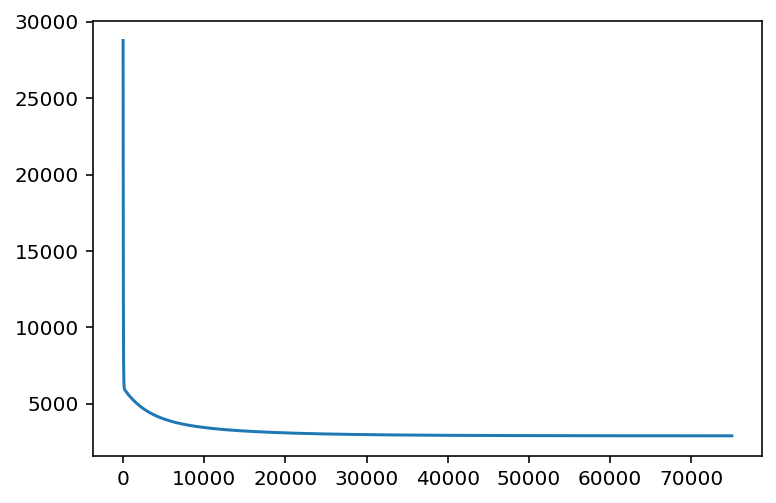

In [18]:
# train loss 시각화
plt.plot(losses)
plt.show()

### (10) test 데이터에 대한 성능 확인하기
---
- test 데이터에 대한 성능을 확인해주세요.

In [20]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2875.3189084104097

### (11) 정답 데이터와 예측한 데이터 시각화하기
---
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

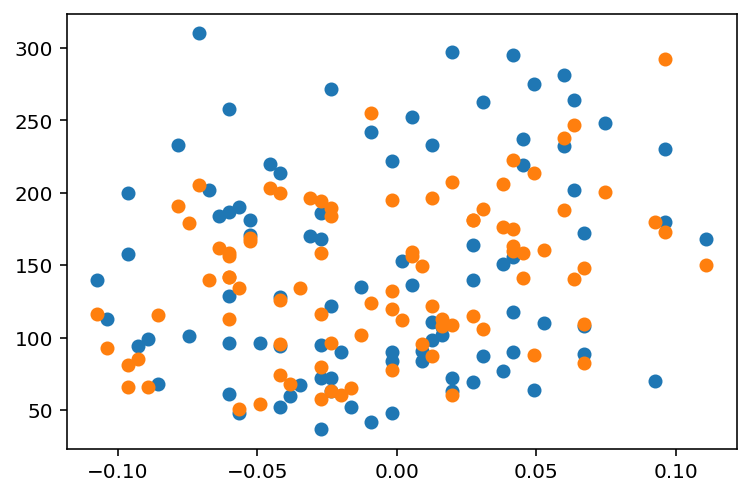

In [21]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 추가 : feature 선택 (최적의 컬럼만 사용하기 위해 SelectKBest 사용)
- Scikit-learn에서 제공하는 특성 선택 방법 중 하나로, 데이터에서 가장 중요한 특성을 선택하여 차원의 축소를 가능
    - score_func: 특성을 평가하는 데 사용할 함수, 예를 들어 f_regression을 사용하면 각 특성에 대해 F-통계량을 계산하여 가장 유의미한 특성을 선택
    - k: 선택할 특성의 개수를 지정하는 파라, 예를 들어, k=6으로 설정하면 가장 중요한 6개의 특성을 선택합니다.  
    
 - https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.SelectKBest.html

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

In [23]:
# 특성 선택 (최적의 컬럼만 사용하기 위해 SelectKBest 사용)
# Test 시 10개 전부 사용시 가장 결과가 잘 나왔음
selector = SelectKBest(score_func=f_regression, k=10)  # 최적의 개 특성 선택
X_new = selector.fit_transform(df_X, df_y)
selected_features = df_X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [24]:
# 모델에 입력할 데이터 X, y 준비하기
X = X_new

# train 데이터와 test 데이터로 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 준비하기
# 가중치 W와 절편 b 초기화
W = np.zeros(X_train.shape[1])
b = 0.0

In [25]:
losses = []

for i in range(num_iterations):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 0 : Loss 28774.4052
Iteration 10 : Loss 21220.0729
Iteration 20 : Loss 16174.1411
Iteration 30 : Loss 12802.8366
Iteration 40 : Loss 10549.5285
Iteration 50 : Loss 9042.6079
Iteration 60 : Loss 8033.9870
Iteration 70 : Loss 7358.0412
Iteration 80 : Loss 6904.1989
Iteration 90 : Loss 6598.6421
Iteration 100 : Loss 6392.0894
Iteration 110 : Loss 6251.6403
Iteration 120 : Loss 6155.3304
Iteration 130 : Loss 6088.4960
Iteration 140 : Loss 6041.3475
Iteration 150 : Loss 6007.3496
Iteration 160 : Loss 5982.1388
Iteration 170 : Loss 5962.8024
Iteration 180 : Loss 5947.3956
Iteration 190 : Loss 5934.6202
Iteration 200 : Loss 5923.6093
Iteration 210 : Loss 5913.7841
Iteration 220 : Loss 5904.7585
Iteration 230 : Loss 5896.2743
Iteration 240 : Loss 5888.1594
Iteration 250 : Loss 5880.2987
Iteration 260 : Loss 5872.6154
Iteration 270 : Loss 5865.0582
Iteration 280 : Loss 5857.5928
Iteration 290 : Loss 5850.1963
Iteration 300 : Loss 5842.8534
Iteration 310 : Loss 5835.5538
Iteration 320 

Iteration 3610 : Loss 4325.3505
Iteration 3620 : Loss 4322.6249
Iteration 3630 : Loss 4319.9067
Iteration 3640 : Loss 4317.1960
Iteration 3650 : Loss 4314.4927
Iteration 3660 : Loss 4311.7968
Iteration 3670 : Loss 4309.1082
Iteration 3680 : Loss 4306.4270
Iteration 3690 : Loss 4303.7531
Iteration 3700 : Loss 4301.0865
Iteration 3710 : Loss 4298.4272
Iteration 3720 : Loss 4295.7751
Iteration 3730 : Loss 4293.1302
Iteration 3740 : Loss 4290.4925
Iteration 3750 : Loss 4287.8620
Iteration 3760 : Loss 4285.2387
Iteration 3770 : Loss 4282.6224
Iteration 3780 : Loss 4280.0133
Iteration 3790 : Loss 4277.4112
Iteration 3800 : Loss 4274.8162
Iteration 3810 : Loss 4272.2283
Iteration 3820 : Loss 4269.6473
Iteration 3830 : Loss 4267.0733
Iteration 3840 : Loss 4264.5063
Iteration 3850 : Loss 4261.9463
Iteration 3860 : Loss 4259.3931
Iteration 3870 : Loss 4256.8469
Iteration 3880 : Loss 4254.3075
Iteration 3890 : Loss 4251.7750
Iteration 3900 : Loss 4249.2493
Iteration 3910 : Loss 4246.7304
Iteratio

Iteration 7610 : Loss 3641.0343
Iteration 7620 : Loss 3639.9997
Iteration 7630 : Loss 3638.9672
Iteration 7640 : Loss 3637.9369
Iteration 7650 : Loss 3636.9088
Iteration 7660 : Loss 3635.8828
Iteration 7670 : Loss 3634.8589
Iteration 7680 : Loss 3633.8372
Iteration 7690 : Loss 3632.8175
Iteration 7700 : Loss 3631.8000
Iteration 7710 : Loss 3630.7846
Iteration 7720 : Loss 3629.7714
Iteration 7730 : Loss 3628.7602
Iteration 7740 : Loss 3627.7511
Iteration 7750 : Loss 3626.7441
Iteration 7760 : Loss 3625.7392
Iteration 7770 : Loss 3624.7363
Iteration 7780 : Loss 3623.7355
Iteration 7790 : Loss 3622.7368
Iteration 7800 : Loss 3621.7402
Iteration 7810 : Loss 3620.7456
Iteration 7820 : Loss 3619.7530
Iteration 7830 : Loss 3618.7625
Iteration 7840 : Loss 3617.7740
Iteration 7850 : Loss 3616.7876
Iteration 7860 : Loss 3615.8031
Iteration 7870 : Loss 3614.8207
Iteration 7880 : Loss 3613.8403
Iteration 7890 : Loss 3612.8619
Iteration 7900 : Loss 3611.8855
Iteration 7910 : Loss 3610.9111
Iteratio

Iteration 11370 : Loss 3363.1711
Iteration 11380 : Loss 3362.6467
Iteration 11390 : Loss 3362.1231
Iteration 11400 : Loss 3361.6004
Iteration 11410 : Loss 3361.0784
Iteration 11420 : Loss 3360.5573
Iteration 11430 : Loss 3360.0370
Iteration 11440 : Loss 3359.5175
Iteration 11450 : Loss 3358.9987
Iteration 11460 : Loss 3358.4808
Iteration 11470 : Loss 3357.9637
Iteration 11480 : Loss 3357.4474
Iteration 11490 : Loss 3356.9319
Iteration 11500 : Loss 3356.4171
Iteration 11510 : Loss 3355.9032
Iteration 11520 : Loss 3355.3900
Iteration 11530 : Loss 3354.8777
Iteration 11540 : Loss 3354.3661
Iteration 11550 : Loss 3353.8553
Iteration 11560 : Loss 3353.3453
Iteration 11570 : Loss 3352.8361
Iteration 11580 : Loss 3352.3277
Iteration 11590 : Loss 3351.8200
Iteration 11600 : Loss 3351.3131
Iteration 11610 : Loss 3350.8070
Iteration 11620 : Loss 3350.3017
Iteration 11630 : Loss 3349.7971
Iteration 11640 : Loss 3349.2933
Iteration 11650 : Loss 3348.7903
Iteration 11660 : Loss 3348.2880
Iteration 

Iteration 15190 : Loss 3208.7883
Iteration 15200 : Loss 3208.4779
Iteration 15210 : Loss 3208.1678
Iteration 15220 : Loss 3207.8582
Iteration 15230 : Loss 3207.5489
Iteration 15240 : Loss 3207.2400
Iteration 15250 : Loss 3206.9314
Iteration 15260 : Loss 3206.6233
Iteration 15270 : Loss 3206.3155
Iteration 15280 : Loss 3206.0081
Iteration 15290 : Loss 3205.7011
Iteration 15300 : Loss 3205.3944
Iteration 15310 : Loss 3205.0881
Iteration 15320 : Loss 3204.7822
Iteration 15330 : Loss 3204.4767
Iteration 15340 : Loss 3204.1715
Iteration 15350 : Loss 3203.8667
Iteration 15360 : Loss 3203.5623
Iteration 15370 : Loss 3203.2583
Iteration 15380 : Loss 3202.9546
Iteration 15390 : Loss 3202.6513
Iteration 15400 : Loss 3202.3483
Iteration 15410 : Loss 3202.0457
Iteration 15420 : Loss 3201.7435
Iteration 15430 : Loss 3201.4417
Iteration 15440 : Loss 3201.1402
Iteration 15450 : Loss 3200.8391
Iteration 15460 : Loss 3200.5383
Iteration 15470 : Loss 3200.2380
Iteration 15480 : Loss 3199.9379
Iteration 

Iteration 17710 : Loss 3141.0974
Iteration 17720 : Loss 3140.8658
Iteration 17730 : Loss 3140.6343
Iteration 17740 : Loss 3140.4032
Iteration 17750 : Loss 3140.1723
Iteration 17760 : Loss 3139.9417
Iteration 17770 : Loss 3139.7113
Iteration 17780 : Loss 3139.4811
Iteration 17790 : Loss 3139.2513
Iteration 17800 : Loss 3139.0216
Iteration 17810 : Loss 3138.7923
Iteration 17820 : Loss 3138.5632
Iteration 17830 : Loss 3138.3343
Iteration 17840 : Loss 3138.1057
Iteration 17850 : Loss 3137.8773
Iteration 17860 : Loss 3137.6492
Iteration 17870 : Loss 3137.4213
Iteration 17880 : Loss 3137.1937
Iteration 17890 : Loss 3136.9664
Iteration 17900 : Loss 3136.7393
Iteration 17910 : Loss 3136.5124
Iteration 17920 : Loss 3136.2858
Iteration 17930 : Loss 3136.0594
Iteration 17940 : Loss 3135.8333
Iteration 17950 : Loss 3135.6075
Iteration 17960 : Loss 3135.3819
Iteration 17970 : Loss 3135.1565
Iteration 17980 : Loss 3134.9314
Iteration 17990 : Loss 3134.7065
Iteration 18000 : Loss 3134.4819
Iteration 

Iteration 21000 : Loss 3076.8542
Iteration 21010 : Loss 3076.6907
Iteration 21020 : Loss 3076.5273
Iteration 21030 : Loss 3076.3641
Iteration 21040 : Loss 3076.2010
Iteration 21050 : Loss 3076.0382
Iteration 21060 : Loss 3075.8755
Iteration 21070 : Loss 3075.7129
Iteration 21080 : Loss 3075.5505
Iteration 21090 : Loss 3075.3883
Iteration 21100 : Loss 3075.2263
Iteration 21110 : Loss 3075.0644
Iteration 21120 : Loss 3074.9027
Iteration 21130 : Loss 3074.7411
Iteration 21140 : Loss 3074.5797
Iteration 21150 : Loss 3074.4185
Iteration 21160 : Loss 3074.2574
Iteration 21170 : Loss 3074.0965
Iteration 21180 : Loss 3073.9358
Iteration 21190 : Loss 3073.7752
Iteration 21200 : Loss 3073.6148
Iteration 21210 : Loss 3073.4545
Iteration 21220 : Loss 3073.2944
Iteration 21230 : Loss 3073.1345
Iteration 21240 : Loss 3072.9748
Iteration 21250 : Loss 3072.8152
Iteration 21260 : Loss 3072.6557
Iteration 21270 : Loss 3072.4964
Iteration 21280 : Loss 3072.3373
Iteration 21290 : Loss 3072.1784
Iteration 

Iteration 23500 : Loss 3040.6833
Iteration 23510 : Loss 3040.5558
Iteration 23520 : Loss 3040.4286
Iteration 23530 : Loss 3040.3014
Iteration 23540 : Loss 3040.1744
Iteration 23550 : Loss 3040.0474
Iteration 23560 : Loss 3039.9206
Iteration 23570 : Loss 3039.7940
Iteration 23580 : Loss 3039.6674
Iteration 23590 : Loss 3039.5410
Iteration 23600 : Loss 3039.4147
Iteration 23610 : Loss 3039.2886
Iteration 23620 : Loss 3039.1625
Iteration 23630 : Loss 3039.0366
Iteration 23640 : Loss 3038.9108
Iteration 23650 : Loss 3038.7851
Iteration 23660 : Loss 3038.6595
Iteration 23670 : Loss 3038.5341
Iteration 23680 : Loss 3038.4088
Iteration 23690 : Loss 3038.2836
Iteration 23700 : Loss 3038.1585
Iteration 23710 : Loss 3038.0336
Iteration 23720 : Loss 3037.9088
Iteration 23730 : Loss 3037.7841
Iteration 23740 : Loss 3037.6595
Iteration 23750 : Loss 3037.5351
Iteration 23760 : Loss 3037.4107
Iteration 23770 : Loss 3037.2865
Iteration 23780 : Loss 3037.1624
Iteration 23790 : Loss 3037.0384
Iteration 

Iteration 26990 : Loss 3002.9293
Iteration 27000 : Loss 3002.8382
Iteration 27010 : Loss 3002.7472
Iteration 27020 : Loss 3002.6563
Iteration 27030 : Loss 3002.5654
Iteration 27040 : Loss 3002.4747
Iteration 27050 : Loss 3002.3840
Iteration 27060 : Loss 3002.2935
Iteration 27070 : Loss 3002.2030
Iteration 27080 : Loss 3002.1126
Iteration 27090 : Loss 3002.0223
Iteration 27100 : Loss 3001.9320
Iteration 27110 : Loss 3001.8419
Iteration 27120 : Loss 3001.7518
Iteration 27130 : Loss 3001.6619
Iteration 27140 : Loss 3001.5720
Iteration 27150 : Loss 3001.4822
Iteration 27160 : Loss 3001.3924
Iteration 27170 : Loss 3001.3028
Iteration 27180 : Loss 3001.2133
Iteration 27190 : Loss 3001.1238
Iteration 27200 : Loss 3001.0344
Iteration 27210 : Loss 3000.9451
Iteration 27220 : Loss 3000.8559
Iteration 27230 : Loss 3000.7668
Iteration 27240 : Loss 3000.6777
Iteration 27250 : Loss 3000.5888
Iteration 27260 : Loss 3000.4999
Iteration 27270 : Loss 3000.4111
Iteration 27280 : Loss 3000.3224
Iteration 

Iteration 29630 : Loss 2981.6206
Iteration 29640 : Loss 2981.5495
Iteration 29650 : Loss 2981.4784
Iteration 29660 : Loss 2981.4074
Iteration 29670 : Loss 2981.3364
Iteration 29680 : Loss 2981.2655
Iteration 29690 : Loss 2981.1947
Iteration 29700 : Loss 2981.1239
Iteration 29710 : Loss 2981.0532
Iteration 29720 : Loss 2980.9826
Iteration 29730 : Loss 2980.9120
Iteration 29740 : Loss 2980.8415
Iteration 29750 : Loss 2980.7711
Iteration 29760 : Loss 2980.7007
Iteration 29770 : Loss 2980.6304
Iteration 29780 : Loss 2980.5602
Iteration 29790 : Loss 2980.4900
Iteration 29800 : Loss 2980.4199
Iteration 29810 : Loss 2980.3498
Iteration 29820 : Loss 2980.2798
Iteration 29830 : Loss 2980.2099
Iteration 29840 : Loss 2980.1401
Iteration 29850 : Loss 2980.0703
Iteration 29860 : Loss 2980.0006
Iteration 29870 : Loss 2979.9309
Iteration 29880 : Loss 2979.8613
Iteration 29890 : Loss 2979.7918
Iteration 29900 : Loss 2979.7223
Iteration 29910 : Loss 2979.6529
Iteration 29920 : Loss 2979.5836
Iteration 

Iteration 33020 : Loss 2960.8831
Iteration 33030 : Loss 2960.8309
Iteration 33040 : Loss 2960.7788
Iteration 33050 : Loss 2960.7267
Iteration 33060 : Loss 2960.6746
Iteration 33070 : Loss 2960.6226
Iteration 33080 : Loss 2960.5707
Iteration 33090 : Loss 2960.5188
Iteration 33100 : Loss 2960.4669
Iteration 33110 : Loss 2960.4151
Iteration 33120 : Loss 2960.3633
Iteration 33130 : Loss 2960.3116
Iteration 33140 : Loss 2960.2599
Iteration 33150 : Loss 2960.2083
Iteration 33160 : Loss 2960.1567
Iteration 33170 : Loss 2960.1052
Iteration 33180 : Loss 2960.0537
Iteration 33190 : Loss 2960.0023
Iteration 33200 : Loss 2959.9509
Iteration 33210 : Loss 2959.8996
Iteration 33220 : Loss 2959.8483
Iteration 33230 : Loss 2959.7970
Iteration 33240 : Loss 2959.7458
Iteration 33250 : Loss 2959.6946
Iteration 33260 : Loss 2959.6435
Iteration 33270 : Loss 2959.5925
Iteration 33280 : Loss 2959.5414
Iteration 33290 : Loss 2959.4905
Iteration 33300 : Loss 2959.4395
Iteration 33310 : Loss 2959.3887
Iteration 

Iteration 35710 : Loss 2948.4074
Iteration 35720 : Loss 2948.3664
Iteration 35730 : Loss 2948.3254
Iteration 35740 : Loss 2948.2845
Iteration 35750 : Loss 2948.2436
Iteration 35760 : Loss 2948.2027
Iteration 35770 : Loss 2948.1619
Iteration 35780 : Loss 2948.1211
Iteration 35790 : Loss 2948.0803
Iteration 35800 : Loss 2948.0396
Iteration 35810 : Loss 2947.9989
Iteration 35820 : Loss 2947.9583
Iteration 35830 : Loss 2947.9177
Iteration 35840 : Loss 2947.8771
Iteration 35850 : Loss 2947.8365
Iteration 35860 : Loss 2947.7960
Iteration 35870 : Loss 2947.7556
Iteration 35880 : Loss 2947.7151
Iteration 35890 : Loss 2947.6747
Iteration 35900 : Loss 2947.6344
Iteration 35910 : Loss 2947.5941
Iteration 35920 : Loss 2947.5538
Iteration 35930 : Loss 2947.5135
Iteration 35940 : Loss 2947.4733
Iteration 35950 : Loss 2947.4331
Iteration 35960 : Loss 2947.3930
Iteration 35970 : Loss 2947.3529
Iteration 35980 : Loss 2947.3128
Iteration 35990 : Loss 2947.2727
Iteration 36000 : Loss 2947.2327
Iteration 

Iteration 38920 : Loss 2936.9368
Iteration 38930 : Loss 2936.9059
Iteration 38940 : Loss 2936.8750
Iteration 38950 : Loss 2936.8441
Iteration 38960 : Loss 2936.8132
Iteration 38970 : Loss 2936.7824
Iteration 38980 : Loss 2936.7516
Iteration 38990 : Loss 2936.7208
Iteration 39000 : Loss 2936.6901
Iteration 39010 : Loss 2936.6594
Iteration 39020 : Loss 2936.6287
Iteration 39030 : Loss 2936.5980
Iteration 39040 : Loss 2936.5674
Iteration 39050 : Loss 2936.5368
Iteration 39060 : Loss 2936.5062
Iteration 39070 : Loss 2936.4756
Iteration 39080 : Loss 2936.4451
Iteration 39090 : Loss 2936.4146
Iteration 39100 : Loss 2936.3841
Iteration 39110 : Loss 2936.3536
Iteration 39120 : Loss 2936.3232
Iteration 39130 : Loss 2936.2928
Iteration 39140 : Loss 2936.2624
Iteration 39150 : Loss 2936.2321
Iteration 39160 : Loss 2936.2018
Iteration 39170 : Loss 2936.1715
Iteration 39180 : Loss 2936.1412
Iteration 39190 : Loss 2936.1109
Iteration 39200 : Loss 2936.0807
Iteration 39210 : Loss 2936.0505
Iteration 

Iteration 41630 : Loss 2929.4588
Iteration 41640 : Loss 2929.4343
Iteration 41650 : Loss 2929.4099
Iteration 41660 : Loss 2929.3854
Iteration 41670 : Loss 2929.3610
Iteration 41680 : Loss 2929.3366
Iteration 41690 : Loss 2929.3122
Iteration 41700 : Loss 2929.2878
Iteration 41710 : Loss 2929.2634
Iteration 41720 : Loss 2929.2391
Iteration 41730 : Loss 2929.2148
Iteration 41740 : Loss 2929.1905
Iteration 41750 : Loss 2929.1662
Iteration 41760 : Loss 2929.1420
Iteration 41770 : Loss 2929.1177
Iteration 41780 : Loss 2929.0935
Iteration 41790 : Loss 2929.0694
Iteration 41800 : Loss 2929.0452
Iteration 41810 : Loss 2929.0210
Iteration 41820 : Loss 2928.9969
Iteration 41830 : Loss 2928.9728
Iteration 41840 : Loss 2928.9487
Iteration 41850 : Loss 2928.9247
Iteration 41860 : Loss 2928.9006
Iteration 41870 : Loss 2928.8766
Iteration 41880 : Loss 2928.8526
Iteration 41890 : Loss 2928.8286
Iteration 41900 : Loss 2928.8046
Iteration 41910 : Loss 2928.7807
Iteration 41920 : Loss 2928.7568
Iteration 

Iteration 44840 : Loss 2922.5692
Iteration 44850 : Loss 2922.5505
Iteration 44860 : Loss 2922.5318
Iteration 44870 : Loss 2922.5131
Iteration 44880 : Loss 2922.4945
Iteration 44890 : Loss 2922.4759
Iteration 44900 : Loss 2922.4572
Iteration 44910 : Loss 2922.4386
Iteration 44920 : Loss 2922.4201
Iteration 44930 : Loss 2922.4015
Iteration 44940 : Loss 2922.3829
Iteration 44950 : Loss 2922.3644
Iteration 44960 : Loss 2922.3459
Iteration 44970 : Loss 2922.3274
Iteration 44980 : Loss 2922.3089
Iteration 44990 : Loss 2922.2904
Iteration 45000 : Loss 2922.2719
Iteration 45010 : Loss 2922.2535
Iteration 45020 : Loss 2922.2351
Iteration 45030 : Loss 2922.2166
Iteration 45040 : Loss 2922.1982
Iteration 45050 : Loss 2922.1799
Iteration 45060 : Loss 2922.1615
Iteration 45070 : Loss 2922.1431
Iteration 45080 : Loss 2922.1248
Iteration 45090 : Loss 2922.1065
Iteration 45100 : Loss 2922.0882
Iteration 45110 : Loss 2922.0699
Iteration 45120 : Loss 2922.0516
Iteration 45130 : Loss 2922.0333
Iteration 

Iteration 47520 : Loss 2918.0741
Iteration 47530 : Loss 2918.0591
Iteration 47540 : Loss 2918.0442
Iteration 47550 : Loss 2918.0292
Iteration 47560 : Loss 2918.0142
Iteration 47570 : Loss 2917.9993
Iteration 47580 : Loss 2917.9844
Iteration 47590 : Loss 2917.9695
Iteration 47600 : Loss 2917.9546
Iteration 47610 : Loss 2917.9397
Iteration 47620 : Loss 2917.9248
Iteration 47630 : Loss 2917.9099
Iteration 47640 : Loss 2917.8951
Iteration 47650 : Loss 2917.8802
Iteration 47660 : Loss 2917.8654
Iteration 47670 : Loss 2917.8506
Iteration 47680 : Loss 2917.8358
Iteration 47690 : Loss 2917.8210
Iteration 47700 : Loss 2917.8062
Iteration 47710 : Loss 2917.7914
Iteration 47720 : Loss 2917.7767
Iteration 47730 : Loss 2917.7619
Iteration 47740 : Loss 2917.7472
Iteration 47750 : Loss 2917.7325
Iteration 47760 : Loss 2917.7178
Iteration 47770 : Loss 2917.7031
Iteration 47780 : Loss 2917.6884
Iteration 47790 : Loss 2917.6737
Iteration 47800 : Loss 2917.6591
Iteration 47810 : Loss 2917.6444
Iteration 

Iteration 50740 : Loss 2913.8239
Iteration 50750 : Loss 2913.8124
Iteration 50760 : Loss 2913.8008
Iteration 50770 : Loss 2913.7893
Iteration 50780 : Loss 2913.7777
Iteration 50790 : Loss 2913.7662
Iteration 50800 : Loss 2913.7547
Iteration 50810 : Loss 2913.7432
Iteration 50820 : Loss 2913.7317
Iteration 50830 : Loss 2913.7202
Iteration 50840 : Loss 2913.7087
Iteration 50850 : Loss 2913.6972
Iteration 50860 : Loss 2913.6858
Iteration 50870 : Loss 2913.6743
Iteration 50880 : Loss 2913.6629
Iteration 50890 : Loss 2913.6514
Iteration 50900 : Loss 2913.6400
Iteration 50910 : Loss 2913.6286
Iteration 50920 : Loss 2913.6172
Iteration 50930 : Loss 2913.6058
Iteration 50940 : Loss 2913.5944
Iteration 50950 : Loss 2913.5830
Iteration 50960 : Loss 2913.5716
Iteration 50970 : Loss 2913.5603
Iteration 50980 : Loss 2913.5489
Iteration 50990 : Loss 2913.5376
Iteration 51000 : Loss 2913.5262
Iteration 51010 : Loss 2913.5149
Iteration 51020 : Loss 2913.5036
Iteration 51030 : Loss 2913.4923
Iteration 

Iteration 54410 : Loss 2910.1366
Iteration 54420 : Loss 2910.1279
Iteration 54430 : Loss 2910.1193
Iteration 54440 : Loss 2910.1106
Iteration 54450 : Loss 2910.1020
Iteration 54460 : Loss 2910.0933
Iteration 54470 : Loss 2910.0847
Iteration 54480 : Loss 2910.0760
Iteration 54490 : Loss 2910.0674
Iteration 54500 : Loss 2910.0588
Iteration 54510 : Loss 2910.0502
Iteration 54520 : Loss 2910.0415
Iteration 54530 : Loss 2910.0329
Iteration 54540 : Loss 2910.0243
Iteration 54550 : Loss 2910.0158
Iteration 54560 : Loss 2910.0072
Iteration 54570 : Loss 2909.9986
Iteration 54580 : Loss 2909.9900
Iteration 54590 : Loss 2909.9815
Iteration 54600 : Loss 2909.9729
Iteration 54610 : Loss 2909.9644
Iteration 54620 : Loss 2909.9558
Iteration 54630 : Loss 2909.9473
Iteration 54640 : Loss 2909.9387
Iteration 54650 : Loss 2909.9302
Iteration 54660 : Loss 2909.9217
Iteration 54670 : Loss 2909.9132
Iteration 54680 : Loss 2909.9047
Iteration 54690 : Loss 2909.8962
Iteration 54700 : Loss 2909.8877
Iteration 

Iteration 56890 : Loss 2908.1758
Iteration 56900 : Loss 2908.1687
Iteration 56910 : Loss 2908.1615
Iteration 56920 : Loss 2908.1543
Iteration 56930 : Loss 2908.1471
Iteration 56940 : Loss 2908.1400
Iteration 56950 : Loss 2908.1328
Iteration 56960 : Loss 2908.1257
Iteration 56970 : Loss 2908.1185
Iteration 56980 : Loss 2908.1114
Iteration 56990 : Loss 2908.1043
Iteration 57000 : Loss 2908.0971
Iteration 57010 : Loss 2908.0900
Iteration 57020 : Loss 2908.0829
Iteration 57030 : Loss 2908.0758
Iteration 57040 : Loss 2908.0687
Iteration 57050 : Loss 2908.0616
Iteration 57060 : Loss 2908.0545
Iteration 57070 : Loss 2908.0474
Iteration 57080 : Loss 2908.0403
Iteration 57090 : Loss 2908.0332
Iteration 57100 : Loss 2908.0261
Iteration 57110 : Loss 2908.0191
Iteration 57120 : Loss 2908.0120
Iteration 57130 : Loss 2908.0049
Iteration 57140 : Loss 2907.9979
Iteration 57150 : Loss 2907.9908
Iteration 57160 : Loss 2907.9838
Iteration 57170 : Loss 2907.9768
Iteration 57180 : Loss 2907.9697
Iteration 

Iteration 59810 : Loss 2906.2905
Iteration 59820 : Loss 2906.2847
Iteration 59830 : Loss 2906.2789
Iteration 59840 : Loss 2906.2731
Iteration 59850 : Loss 2906.2674
Iteration 59860 : Loss 2906.2616
Iteration 59870 : Loss 2906.2558
Iteration 59880 : Loss 2906.2501
Iteration 59890 : Loss 2906.2443
Iteration 59900 : Loss 2906.2386
Iteration 59910 : Loss 2906.2328
Iteration 59920 : Loss 2906.2271
Iteration 59930 : Loss 2906.2213
Iteration 59940 : Loss 2906.2156
Iteration 59950 : Loss 2906.2099
Iteration 59960 : Loss 2906.2042
Iteration 59970 : Loss 2906.1984
Iteration 59980 : Loss 2906.1927
Iteration 59990 : Loss 2906.1870
Iteration 60000 : Loss 2906.1813
Iteration 60010 : Loss 2906.1756
Iteration 60020 : Loss 2906.1699
Iteration 60030 : Loss 2906.1642
Iteration 60040 : Loss 2906.1585
Iteration 60050 : Loss 2906.1528
Iteration 60060 : Loss 2906.1471
Iteration 60070 : Loss 2906.1415
Iteration 60080 : Loss 2906.1358
Iteration 60090 : Loss 2906.1301
Iteration 60100 : Loss 2906.1245
Iteration 

Iteration 62750 : Loss 2904.7587
Iteration 62760 : Loss 2904.7540
Iteration 62770 : Loss 2904.7493
Iteration 62780 : Loss 2904.7446
Iteration 62790 : Loss 2904.7400
Iteration 62800 : Loss 2904.7353
Iteration 62810 : Loss 2904.7306
Iteration 62820 : Loss 2904.7260
Iteration 62830 : Loss 2904.7213
Iteration 62840 : Loss 2904.7167
Iteration 62850 : Loss 2904.7120
Iteration 62860 : Loss 2904.7074
Iteration 62870 : Loss 2904.7027
Iteration 62880 : Loss 2904.6981
Iteration 62890 : Loss 2904.6935
Iteration 62900 : Loss 2904.6888
Iteration 62910 : Loss 2904.6842
Iteration 62920 : Loss 2904.6796
Iteration 62930 : Loss 2904.6749
Iteration 62940 : Loss 2904.6703
Iteration 62950 : Loss 2904.6657
Iteration 62960 : Loss 2904.6611
Iteration 62970 : Loss 2904.6565
Iteration 62980 : Loss 2904.6519
Iteration 62990 : Loss 2904.6473
Iteration 63000 : Loss 2904.6427
Iteration 63010 : Loss 2904.6381
Iteration 63020 : Loss 2904.6335
Iteration 63030 : Loss 2904.6289
Iteration 63040 : Loss 2904.6243
Iteration 

Iteration 65250 : Loss 2903.6858
Iteration 65260 : Loss 2903.6819
Iteration 65270 : Loss 2903.6780
Iteration 65280 : Loss 2903.6740
Iteration 65290 : Loss 2903.6701
Iteration 65300 : Loss 2903.6662
Iteration 65310 : Loss 2903.6623
Iteration 65320 : Loss 2903.6584
Iteration 65330 : Loss 2903.6545
Iteration 65340 : Loss 2903.6506
Iteration 65350 : Loss 2903.6467
Iteration 65360 : Loss 2903.6428
Iteration 65370 : Loss 2903.6389
Iteration 65380 : Loss 2903.6350
Iteration 65390 : Loss 2903.6311
Iteration 65400 : Loss 2903.6272
Iteration 65410 : Loss 2903.6233
Iteration 65420 : Loss 2903.6194
Iteration 65430 : Loss 2903.6155
Iteration 65440 : Loss 2903.6117
Iteration 65450 : Loss 2903.6078
Iteration 65460 : Loss 2903.6039
Iteration 65470 : Loss 2903.6000
Iteration 65480 : Loss 2903.5962
Iteration 65490 : Loss 2903.5923
Iteration 65500 : Loss 2903.5884
Iteration 65510 : Loss 2903.5846
Iteration 65520 : Loss 2903.5807
Iteration 65530 : Loss 2903.5769
Iteration 65540 : Loss 2903.5730
Iteration 

Iteration 68290 : Loss 2902.6075
Iteration 68300 : Loss 2902.6043
Iteration 68310 : Loss 2902.6011
Iteration 68320 : Loss 2902.5979
Iteration 68330 : Loss 2902.5947
Iteration 68340 : Loss 2902.5915
Iteration 68350 : Loss 2902.5883
Iteration 68360 : Loss 2902.5851
Iteration 68370 : Loss 2902.5820
Iteration 68380 : Loss 2902.5788
Iteration 68390 : Loss 2902.5756
Iteration 68400 : Loss 2902.5724
Iteration 68410 : Loss 2902.5693
Iteration 68420 : Loss 2902.5661
Iteration 68430 : Loss 2902.5629
Iteration 68440 : Loss 2902.5598
Iteration 68450 : Loss 2902.5566
Iteration 68460 : Loss 2902.5534
Iteration 68470 : Loss 2902.5503
Iteration 68480 : Loss 2902.5471
Iteration 68490 : Loss 2902.5440
Iteration 68500 : Loss 2902.5408
Iteration 68510 : Loss 2902.5377
Iteration 68520 : Loss 2902.5345
Iteration 68530 : Loss 2902.5314
Iteration 68540 : Loss 2902.5282
Iteration 68550 : Loss 2902.5251
Iteration 68560 : Loss 2902.5219
Iteration 68570 : Loss 2902.5188
Iteration 68580 : Loss 2902.5157
Iteration 

Iteration 70910 : Loss 2901.8385
Iteration 70920 : Loss 2901.8358
Iteration 70930 : Loss 2901.8332
Iteration 70940 : Loss 2901.8305
Iteration 70950 : Loss 2901.8278
Iteration 70960 : Loss 2901.8251
Iteration 70970 : Loss 2901.8224
Iteration 70980 : Loss 2901.8197
Iteration 70990 : Loss 2901.8171
Iteration 71000 : Loss 2901.8144
Iteration 71010 : Loss 2901.8117
Iteration 71020 : Loss 2901.8090
Iteration 71030 : Loss 2901.8064
Iteration 71040 : Loss 2901.8037
Iteration 71050 : Loss 2901.8010
Iteration 71060 : Loss 2901.7984
Iteration 71070 : Loss 2901.7957
Iteration 71080 : Loss 2901.7930
Iteration 71090 : Loss 2901.7904
Iteration 71100 : Loss 2901.7877
Iteration 71110 : Loss 2901.7851
Iteration 71120 : Loss 2901.7824
Iteration 71130 : Loss 2901.7797
Iteration 71140 : Loss 2901.7771
Iteration 71150 : Loss 2901.7744
Iteration 71160 : Loss 2901.7718
Iteration 71170 : Loss 2901.7691
Iteration 71180 : Loss 2901.7665
Iteration 71190 : Loss 2901.7639
Iteration 71200 : Loss 2901.7612
Iteration 

Iteration 74060 : Loss 2901.0704
Iteration 74070 : Loss 2901.0682
Iteration 74080 : Loss 2901.0660
Iteration 74090 : Loss 2901.0638
Iteration 74100 : Loss 2901.0616
Iteration 74110 : Loss 2901.0594
Iteration 74120 : Loss 2901.0572
Iteration 74130 : Loss 2901.0550
Iteration 74140 : Loss 2901.0528
Iteration 74150 : Loss 2901.0506
Iteration 74160 : Loss 2901.0484
Iteration 74170 : Loss 2901.0462
Iteration 74180 : Loss 2901.0440
Iteration 74190 : Loss 2901.0418
Iteration 74200 : Loss 2901.0396
Iteration 74210 : Loss 2901.0375
Iteration 74220 : Loss 2901.0353
Iteration 74230 : Loss 2901.0331
Iteration 74240 : Loss 2901.0309
Iteration 74250 : Loss 2901.0287
Iteration 74260 : Loss 2901.0265
Iteration 74270 : Loss 2901.0244
Iteration 74280 : Loss 2901.0222
Iteration 74290 : Loss 2901.0200
Iteration 74300 : Loss 2901.0178
Iteration 74310 : Loss 2901.0157
Iteration 74320 : Loss 2901.0135
Iteration 74330 : Loss 2901.0113
Iteration 74340 : Loss 2901.0092
Iteration 74350 : Loss 2901.0070
Iteration 

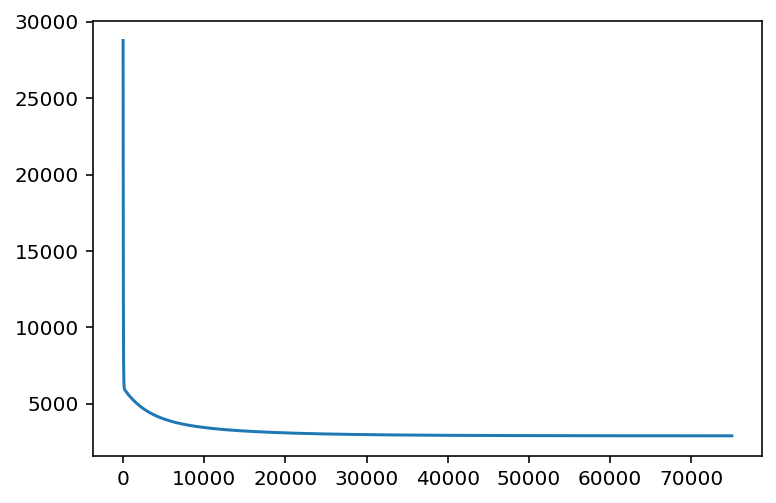

In [26]:
plt.plot(losses)
plt.show()

In [27]:
# 최종 손실 출력
y_pred_train = model(X_train, W, b)
train_loss = MSE(y_train, y_pred_train)
print(f"\nFinal Training Loss: {train_loss}")


Final Training Loss: 2900.8691548201514


In [28]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2875.3189084104097

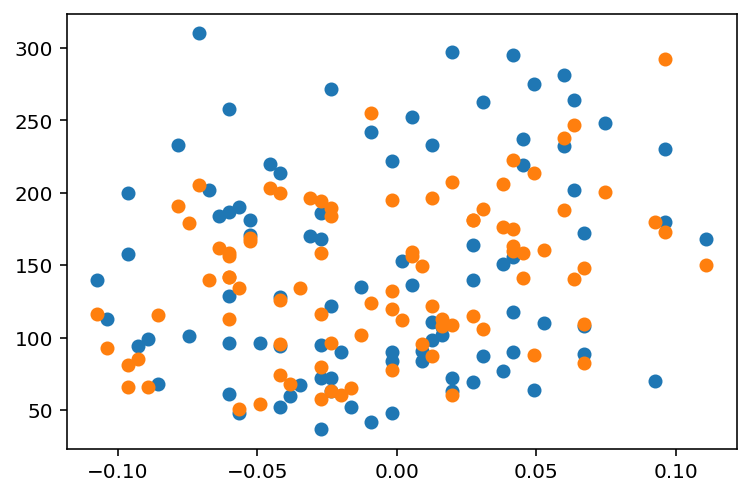

In [29]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()